# Simple Neural Network or Perceptron

Task: Use only numpy and matplot lib to construct a neural net.

Sources: https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-adding-hidden-layers/ ; https://towardsdatascience.com/6-steps-to-write-any-machine-learning-algorithm-from-scratch-perceptron-case-study-335f638a70f3

Author: abirSpidey

(200, 3)
(3, 1)
(matrix([[0.08913824]]), 1.9216408971371164)


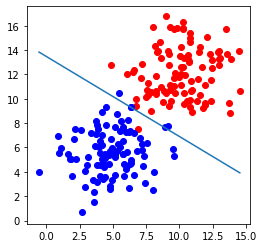

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw(x1,x2):
    ln=plt.plot(x1,x2,'-')

def sigmoid(score):
    return 1/(1+np.exp(-score))

def calculate_error(line_parameters, points , y):
    n=points.shape[0]
    p= sigmoid(points*line_parameters)
    cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
    mse = ((1 / 2) * (np.power((p - y), 2)))
    #print(error_out.sum())
    return cross_entropy, mse.sum() 

def gradient_descent(line_parameters, points, y , alpha):
    n=points.shape[0]
    for i in range(4000):
        p=sigmoid(points*line_parameters)
        gradient= points.T*(p-y)*(alpha/n)
        line_parameters = line_parameters - gradient

        w1=line_parameters.item(0)
        w2=line_parameters.item(1)
        b=line_parameters.item(2)

        x1=np.array([points[:,0].min(), points[:,0].max()])
        x2= -b/w2 + (x1*(-w1/w2))
    print(calculate_error(line_parameters, points, y))
    draw(x1,x2)
    
# make data points
n_pts=100
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))
print(all_points.shape)   
line_parameters = np.matrix([np.zeros(3)]).T
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)
print(line_parameters.shape)
#plotting
_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, all_points, y , 0.08)
plt.show()

# Conclusion
1. Showed a simple perceptron for classification.
2. Used cross entropy and MSE to see the error value.
3. Now we will try the same with multiple perceptron to compare.


# Multiple Perceptron
For multiple perceptron we use the concept that the input features in case here 3. Please note we have included a bias of 1 for all the points above so this is also taken as a feature by the neural network. 

In [51]:
def sigmoid_der(x):
    return sigmoid(x) *(1-sigmoid (x))
np.random.seed(0)
wh = np.random.rand(len(all_points[0]),4) 
wo = np.random.rand(4, 1)
alpha=.008
for epoch in range(4000):
    # feedforward
    zh = np.dot(all_points, wh)
    ah = sigmoid(zh)

    zo = np.dot(ah, wo)
    ao = sigmoid(zo)

    # Phase1 =======================

    error_out = ((1 / 2) * (np.power((ao - y), 2)))
    #print(error_out.sum())

    dcost_dao = ao - y
    dao_dzo = sigmoid_der(zo) 
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dao * dao_dzo)

    # Phase 2 =======================

    # dcost_w1 = dcost_dah * dah_dzh * dzh_dw1
    # dcost_dah = dcost_dzo * dzo_dah
    dcost_dzo = dcost_dao * dao_dzo
    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo , dzo_dah.T)
    dah_dzh = sigmoid_der(zh) 
    dzh_dwh = all_points
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    # Update Weights ================

    wh -= alpha * dcost_wh
    wo -= alpha * dcost_wo
print(error_out.sum())  

1.3723824968999463


# Conclusion
We can see that the above performed better than a single perceptron with same learning rate and epochs although this might not be a huge difference but any slight improvement in a model has a huge impact on the performance, thus showing why multiple perceptrons are better.

To test AND, OR, NOT and XOR but before that some doubts

# AND OR and NOT with perceptrons
Before we design the perceptron and multilayer hidden node let us have some fun implimenting manually by changing the code below and check our results. Once you got check with the perceptron and the multi layer perceptron The sequence is AND, OR and NOT ans then XOR. Source for the below code: Classroom implimentation from online MOOC's thatt I attended. 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

def draw(x1,x2):
    line=plt.plot(x1,x2,'-')

def sigmoid(score):
    return 1/(1+np.exp(-score))

def calculate_error(line_parameters, points , y):
    n=points.shape[0]                                                              #total points n
    p= sigmoid(points*line_parameters)                                             #probabilty array for cross entropy
    cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))                     
    mse = ((1 / 2) * (np.power((p - y), 2)))
    #print(error_out.sum())
    return cross_entropy, mse.sum() 

def gradient_descent(line_parameters, points, y , alpha):
    n=points.shape[0]
    for i in range(4000):
        p=sigmoid(points*line_parameters)
        gradient= points.T*(p-y)*(alpha/n)
        line_parameters = line_parameters - gradient                            #line_parameters=w1,w2,b for w1*x1+w2*x2+b

        w1=line_parameters.item(0)
        w2=line_parameters.item(1)
        b=line_parameters.item(2)

        x1=np.array([points[:,0].min(), points[:,0].max()])
        try:
            x2= -b/w2 + (x1*(-w1/w2))
        except:
            print("I am here")
            w2=.1
            w1=.1
    print(calculate_error(line_parameters, points, y))
    draw(x1,x2)
    print("w1: {}, w2: {}, b: {}:".format(w2,w1,b))

In [4]:
#And operator manual descent 

#Set weight1, weight2, and bias

weight1 = 0.0
weight2 = 0.0
bias = 0.0


# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 3 wrong.  Keep trying!

 Input 1    Input 2    Linear Combination    Activation Output   Is Correct
       0          0                   0.0                    1           No
       0          1                   0.0                    1           No
       1          0                   0.0                    1           No
       1          1                   0.0                    1          Yes


(matrix([[0.05277136]]), 0.0070807956633982694)
w1: 5.147843296920535, w2: 5.147843296920535, b: -7.904317775095422:


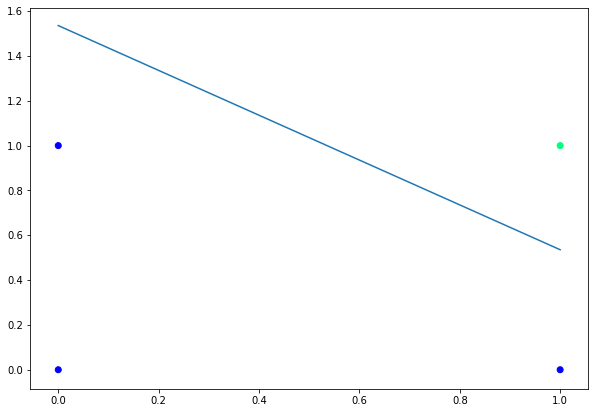

In [5]:
#And operator perceptron
data=np.array([[0.,0.,1.],[0.,1.,1.],[1.,0.,1.],[1.,1.,1.]])
y_label=np.array([0,0,0,1]).reshape(4, 1)
line_params = np.matrix([np.ones(3)]).T
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=y_label.ravel(), cmap=plt.cm.winter)
gradient_descent(line_params,data,y_label,.08)
plt.show()

In [15]:
#OR operator manual descent

#Set weight1, weight2, and bias

weight1 = 0.0
weight2 = 0.0
bias = 0.0


# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -2.0                    0          Yes
      0          1                   4.0                    1          Yes
      1          0                   4.0                    1          Yes
      1          1                  10.0                    1          Yes


(matrix([[0.02910325]]), 0.0026364669602994915)
w1: 6.351224367349058, w2: 6.351224367349058, b: -2.6946125964048915:


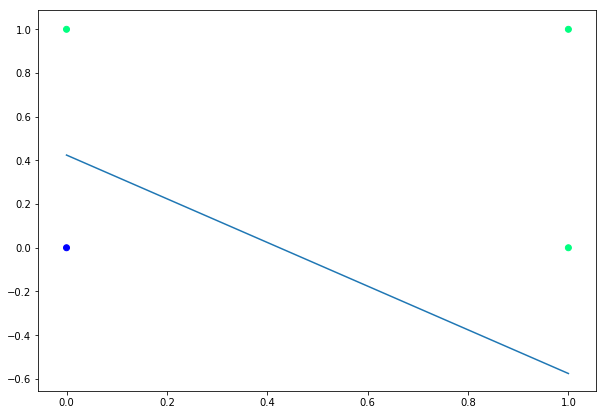

In [14]:
#Or operator perceptron
data=np.array([[0.,0.,1.],[0.,1.,1.],[1.,0.,1.],[1.,1.,1.]])
y_label=np.array([0,1,1,1]).reshape(4, 1)
line_params = np.matrix([np.ones(3)]).T
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=y_label.ravel(), cmap=plt.cm.winter)
gradient_descent(line_params,data,y_label,.08)
plt.show()

In [16]:
#NOT operator manual descent

#Set weight1, weight2, and bias

weight1 = 0.0
weight2 = 0.0
bias = 0.0


# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, False, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 3 wrong.  Keep trying!

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   0.0                    1          Yes
      0          1                   0.0                    1           No
      1          0                   0.0                    1           No
      1          1                   0.0                    1           No


(matrix([[0.02993998]]), 0.002786530544222284)
w1: -6.293356577612781, w2: -6.293356577612781, b: 2.664980310233445:


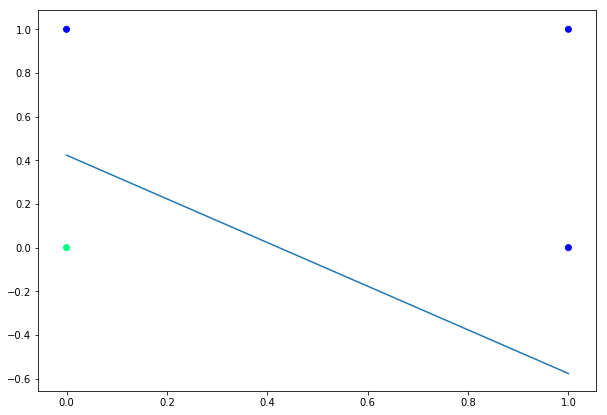

In [18]:
#Not operator perceptron
data=np.array([[0.,0.,1.],[0.,1.,1.],[1.,0.,1.],[1.,1.,1.]])
y_label=np.array([1,0,0,0]).reshape(4, 1)
line_params = np.matrix([np.ones(3)]).T
plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=y_label.ravel(), cmap=plt.cm.winter)
gradient_descent(line_params,data,y_label,.08)
plt.show()

# Class implimenatation of the above:
